## 大專院校大學部人數和碩士班人數的回歸分析

In [578]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import locale
#import matplotlib as mpl
locale.setlocale(locale.LC_NUMERIC, '')

from sklearn.linear_model import LinearRegression


In [579]:
df = pd.read_csv('http://stats.moe.gov.tw/files/detail/107/107_student.csv')

In [580]:
colnames = df.loc[1].values
df = df[2:]
df.columns = colnames

In [581]:
df.set_index('學校代碼', inplace = True) #改index換成'學校代碼'當作 index

In [582]:
undergraduate = df[(df['日間∕進修別'] == 'D 日') & (df['等級別']  == 'B 學士')]
x0 = undergraduate.總計.apply(locale.atof)

In [583]:
master = df[(df['日間∕進修別'] == 'D 日') & (df['等級別']  == 'M 碩士')]
master.rename(columns={'總計':'總計2'}, inplace=True)    #改名，確保不會有相同的columns
y0 = master.總計2.apply(locale.atof)

C:\Users\water\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [584]:
DF = pd.concat([x0, y0], axis=1,sort=False)

"""
DF.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    )           # 來源：https://morvanzhou.github.io/tutorials/data-manipulation/np-pd/3-4-pd-nan/
        沒有作用... 結果直接用 .dropna() 就好了
        
"""

In [585]:
DF = DF.dropna() #去掉有NaN的row

In [594]:
x = np.array(DF.總計)
y = np.array(DF.總計2)

開始training

In [587]:
X = x.reshape(len(x),1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [588]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [589]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [590]:
Y_predict = regr.predict(x_test)

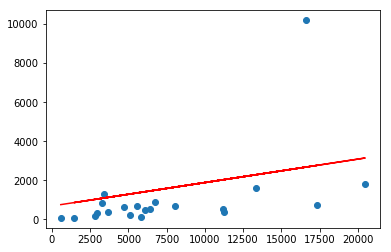

In [591]:
plt.scatter(x_test, y_test)
plt.plot(x_test, Y_predict, 'r')

In [592]:
regr.score(x_test, y_test)

0.15473456706423783

In [ ]:
#結果僅是些微正相關性，但相關性很差